# DNA methylation measurement

Multi-resolution analysis

Piero Palacios Bernuy

## Loading data

In [ ]:
library(minfi)


Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'

The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs

The following objects are masked from 'package:base':

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: S4Vectors


Attaching package: 'S4Vectors'

The following object is masked from 'package:utils':

    findMatches

The following objects are masked from 'package:base':

    expand.grid, I, unname

Loading required package: IRanges


Attaching package: 'IRanges'

The following object is masked from 'package:grDevices':

    windows

Loading required package: GenomeInfoDb

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: 'MatrixGenerics'

The following objects are masked from 'package:matrixStats':

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQuantiles, rowRanges, rowRanks,
    rowSdDiffs, rowSds, rowSums2, rowTabulates, rowVarDiffs, rowVars,
    rowWeightedMads, rowWeightedMeans, rowWeightedMedians,
    rowWeightedSds, rowWeig

Loading required package: Biobase

Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Attaching package: 'Biobase'

The following object is masked from 'package:MatrixGenerics':

    rowMedians

The following objects are masked from 'package:matrixStats':

    anyMissing, rowMedians

Loading required package: Biostrings

Loading required package: XVector


Attaching package: 'Biostrings'

The following object is masked from 'package:base':

    strsplit

Loading required package: bumphunter

Loading required package: foreach

Loading required package: iterators

Loading required package: parallel

Loading required package: locfit

locfit 1.5-9.8   2023-06-11

Setting options('download.file.method.GEOquery'='auto')

Setting options('GEOquery.inmemory.gpl'=FALSE)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::%within%() masks IRanges::%within%()
✖ purrr::accumulate()   masks foreach::accumulate()
✖ dplyr::collapse()     masks Biostrings::collapse(), IRanges::collapse()
✖ dplyr::combine()      masks minfi::combine(), Biobase::combine(), BiocGenerics::combine()
✖ purrr::compact()      masks XVector::compact()
✖ dplyr::count()        masks matrixStats::count()
✖ dplyr::desc()         masks IRanges::desc()
✖ tidyr::expand()       masks S4Vectors::expand()
✖ dplyr::filter()       masks stats::filter()
✖ dplyr::first()        masks S4Vectors::first()
✖ dplyr::lag()          masks stats::lag()
✖ purrr::none()         masks locfit::none()
✖ ggplot2::Position()   masks BiocGenerics::Position(), base::Position()
✖ purrr::reduce()       masks GenomicRanges::reduce(), IRanges::reduce()
✖ dplyr::rename()       masks S4Vectors::rename()
✖ lubridate::second()   masks S4Vectors::second()
✖ lubridate::second<-() ma

Loading required package: GenomicFeatures

Loading required package: AnnotationDbi


Attaching package: 'AnnotationDbi'

The following object is masked from 'package:dplyr':

    select

Loading required package: grid

Attaching package: 'grid'

The following object is masked from 'package:Biostrings':

    pattern

``` r
# This code is not executed due to limit size (50 mb) of github
# Please load the 450karrar_processed.rds data that is the resulto of this code
# If you want to do this with the original data, you can find this data on: 
# https://github.com/genomicsclass/tcgaMethylationSubset

targets <- read.csv("targets.txt", sep = "\t")

targets$Basename <- paste0(getwd(),"/notebooks/", targets$Basename)

dat <- read.metharray(targets$Basename, verbose = T)

pData(dat) <- as(targets, "DataFrame")

## preprocessing

dat <- preprocessIllumina(dat)
dat <- mapToGenome(dat)

## Here we are collaping CpGs for a zxoom_out view of the methylated sites
dat <- cpgCollapse(dat))
```

## Multi-resolution analysis

In [ ]:
dat <- readRDS(file = "450karray_processed_multiresolution2.rds")

targets <- pData(dat$object)


In [ ]:

mcols(granges(dat$object))$type |> 
    table() |> 
    prop.table() |> 
    as.data.frame() |> 
    dplyr::rename("Island Status" = Var1) |> 
    gt::gt()


In [ ]:
cancer_status <- factor(pData(dat$object)$Status,
                        levels = c("normal","cancer"))

X <- model.matrix(~cancer_status)

res <- blockFinder(dat$object,X,cutoff = 0.05)


[bumphunterEngine] Using a single core (backend: doSEQ, version: 1.5.2).

[bumphunterEngine] Computing coefficients.

[bumphunterEngine] Smoothing coefficients.

Loading required package: rngtools

[bumphunterEngine] Finding regions.

[bumphunterEngine] Found 44 bumps.

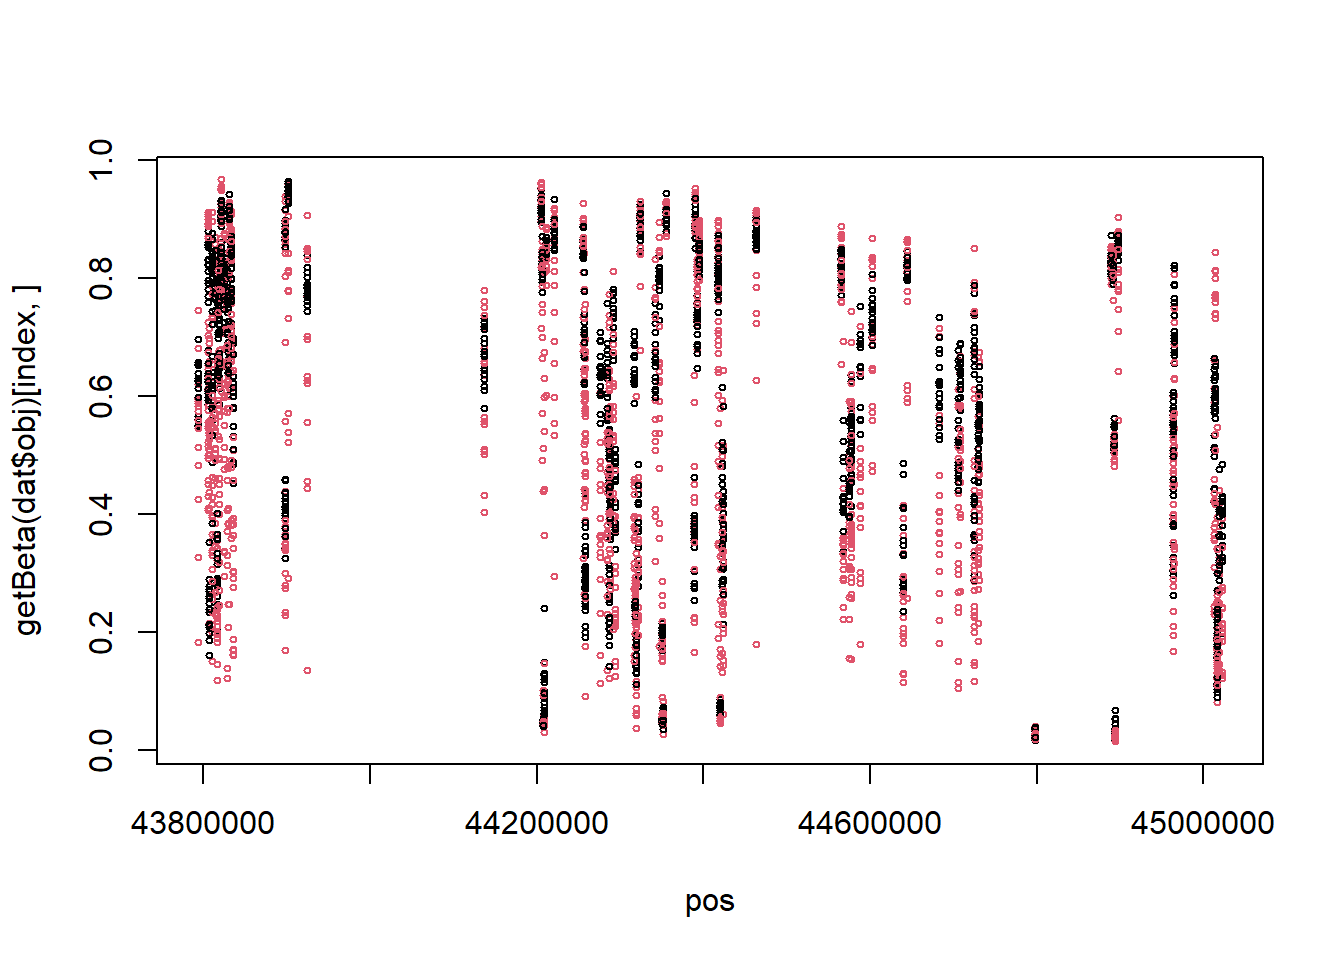

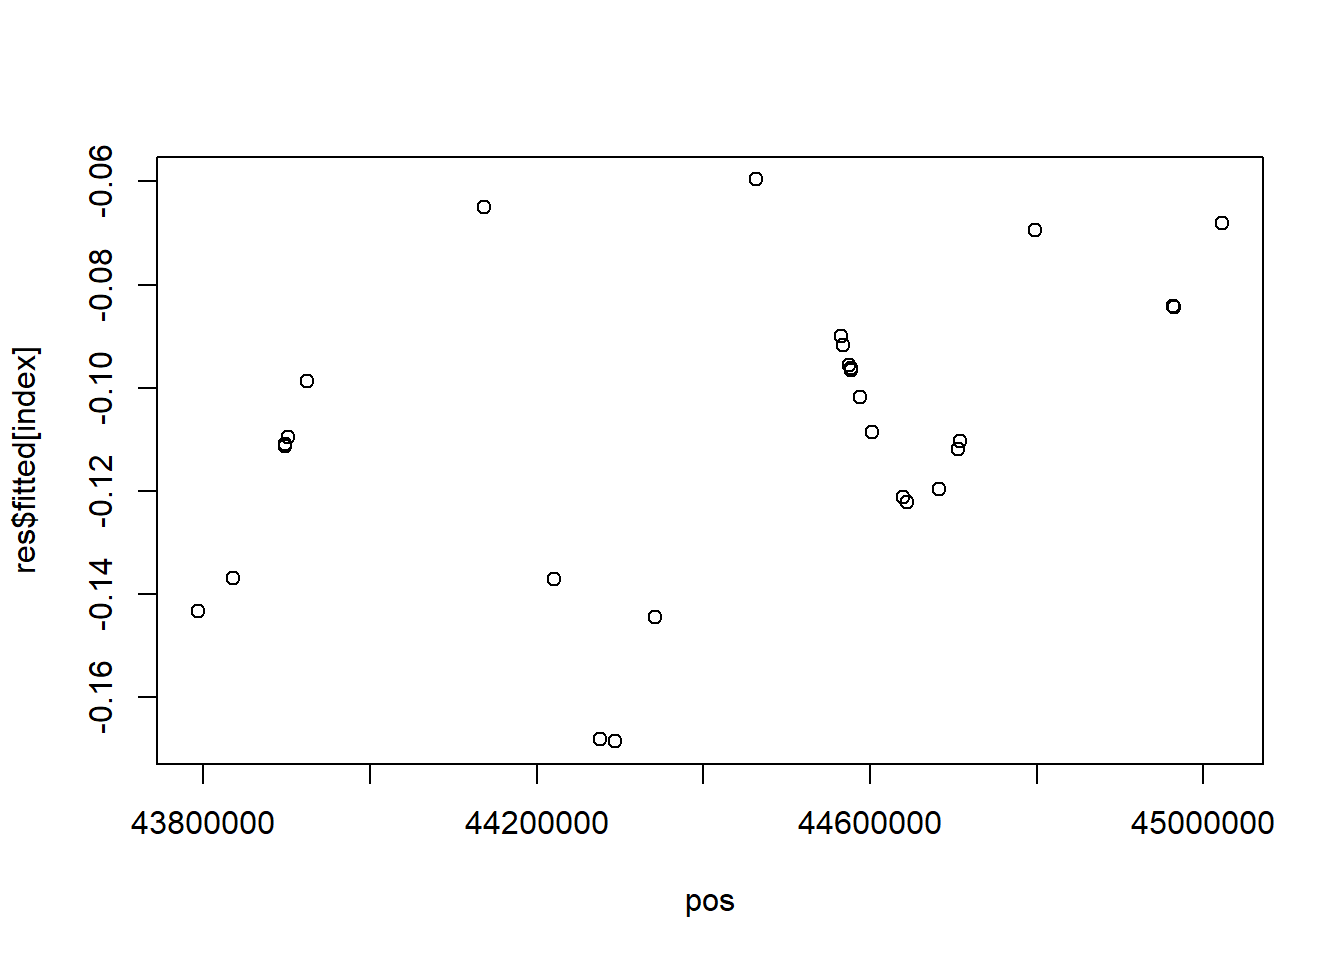

In [ ]:
tab=makeGRangesFromDataFrame(res$table, keep.extra.columns = T)
index= granges(dat$obj)%over% (tab[1]+10000)
pos=start(dat$obj)[index]
col=as.numeric(cancer_status)
matplot(pos,getBeta(dat$obj)[index,],col=col,pch=1,cex=0.5)


## Plotting

In [ ]:
genome <- "hg19"

dmr <- res$table[2,]
chrom <- dmr$chr
start <- dmr$start
end <- dmr$end

minbase <- start
maxbase <- end

pal <- c("#E41A1C", "#377EB8")

iTrack <- IdeogramTrack(genome = genome, chromosome = dmr$chr, name = dmr$chr)
gTrack <- GenomeAxisTrack(col="black", cex=1, name = "", fontcolor="black")

# rTrack <- UcscTrack(genome = genome, 
#                     chromosome = chrom, 
#                     track = "NCBI RefSeq",
#                     from = minbase,
#                     to = maxbase, 
#                     trackType = "GeneRegionTrack",
#                     rstarts = "exonStarts", 
#                     rends = "exonEnds", 
#                     gene = "name",
#                     symbol = "name2", 
#                     transcript = "name",
#                     strand = "strand",
#                     fill = "darkblue",
#                     stacking = "squish", 
#                     name = "RefSeq",
#                     showId = TRUE, 
#                     geneSymbol = TRUE)

gr <- granges(dat$object)

index_1 <- which(targets$Status == "normal")
index_2 <- which(targets$Status == "cancer")

targets$Status[index_1] <- paste(targets$Status[index_1],1:17, sep = ".")
targets$Status[index_2] <- paste(targets$Status[index_2],1:17, sep = ".")

a <- getBeta(dat$object) |> 
    as.data.frame()

names(a) <- targets$Status
index <- order(targets$Status)
a <- a[,index]

for(i in 1:length(targets$Status)){
    
    n <- colnames(a)[i]
    mcols(gr)[,n] <- a[,i]
    
}

# gr$beta <- getBeta(dat$object)

mcols(gr) <- mcols(gr)[,4:37]

methTrack <- DataTrack(range = gr,
                       genome = genome,
                       chromosome = chrom, 
                       ylim = c(-0.05, 1.05),
                       col = pal,
                       type = c("a"), 
                       name = "DNA Meth.\n(beta value)",
                       background.panel = "white", 
                       legend = TRUE, 
                       cex.title = 0.8,
                       cex.axis = 0.8, 
                       cex.legend = 0.8)

dmrTrack <- AnnotationTrack(start = start, 
                            end = end, 
                            genome = genome, 
                            name = "DMR - Multi-resolution",
                            chromosom = chrom)

txTr <- GeneRegionTrack(TxDb.Hsapiens.UCSC.hg19.knownGene, chromosome = chrom,name="Longest transcript")

tracks <- list(iTrack, gTrack, methTrack, dmrTrack, txTr)
sizes <- c(2, 2, 5, 2, 1) # set up the relative sizes of the tracks


In [ ]:
png(file="track_plot.png", width = 1200, height = 550)
plotTracks(tracks, 
           from = minbase, 
           to = maxbase, 
           showTitle = TRUE, 
           add53 = TRUE,
           add35 = TRUE, 
           grid = TRUE, 
           lty.grid = 3, 
           sizes = sizes,
           groups = rep(c("cancer","normal"), each=17),
           length(tracks),
           shape="arrow",collapseTranscripts = "longest")

dev.off()


png 
  2 